# Assignment 2
**Due date** December 6th, 2024.

Meredith Reeves
400477156
reevel5@mcmaster.ca
<br>
Karina Kong
400612833
kongk8@mcmaster.ca

<br>
**Only submit one file per team**

<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Assigments/assigment_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# load the required libraries that you will need for this assignment
#  [5 marks]
# loading any libraries in other cells will deduct you marks.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## (Q1) Linear Regression
* For **Q1** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

To Do: Write an introduction to the linear regression. <br>

The following data is based on a Polynomial expansion to predict the electronic energy of methane for different geometries. <br>
We will follow the work presented in the paper, [paper link](https://pubs.acs.org/doi/full/10.1021/acs.jctc.9b00043)<br>
"*Using Gradients in Permutationally Invariant Polynomial Potential Fitting: A Demonstration for CH4 Using as Few as 100 Configurations*".

The main idea is to expand the inter-atomic distance of the 5 atoms in terms on a polynomial expansion,
$$
y = \sum^{np}_{i} w_i \phi_i(\mathbf{r})
$$
where $w_i$ are the weights, $\phi_i$ are the Permutationally Invariant Polynomial expansion, and $\mathbf{r}$ are the inter-atomic distances.

In the dataset provided, the values of the vector $\mathbf{\phi}(\mathbf{r})^\top = [\phi_0(\mathbf{r}),\cdots,\phi_{np}(\mathbf{r})]$, are in each column of a raw, with the respective energy in the last column.


## (Q1.A) Data preprocessing
1. Load the dataset from the provided link and print the first few rows.<br>
    (https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv)<br>
    1. Answer the following questions,
       1. How many points does the dataset contains?
       2. What is the point with the lowest energy and what is its value?
       3. What is the range of energies in the dataset?
       4. Do a histogram of the energy.
   

## (Q1.B) Data splitting fitting
Before you carry each of these three different strategies to find the optimal mode, you first need to,
   1. Sample **100** random points (training points), and other **500** random points (test points). <br>
   Use the randomly sampled 100 points only for training, and the other 500 to test accuracy of the three different models. <br>

## (Q1.C) Model fitting,
The main goal of this section is to train this regression model using,
   1. Exact solution
   2. Gradient descent
      1. Do not forget to play around with the $\eta$ parameter for gradient descent,
      2. How many iterations do you need to reach a "good" model.
      3. Plot the value of the training error as a function of the iterations in gradient descent, (this is known as **learning curves**).
   3. SVD for linear regression

**Extra results you need to include,**
1. In a single figure, plot the vector of the optimal linear weights of the three models, label each curve.
2. For each model, create a figure where you plot **predicted vs true** values of the training and test points (use different symbols to identify training and test points). <br>
In each figure, also display the [$r^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) value.
3. What of the three models had the best performance?
4. Choose the model with the lowest test error, you can use root mean squared error, and see how much the test error will change if we sample another *100* points from the untouched data as the new training points.
Do this 5 times so we can compute the mean and standard deviation of the test error.


The dataset contains: 9000 points
The value of the lowest energy: -40.48363
The point with the lowest energy: 130
The range of energies in the dataset: 0.06712599999999469


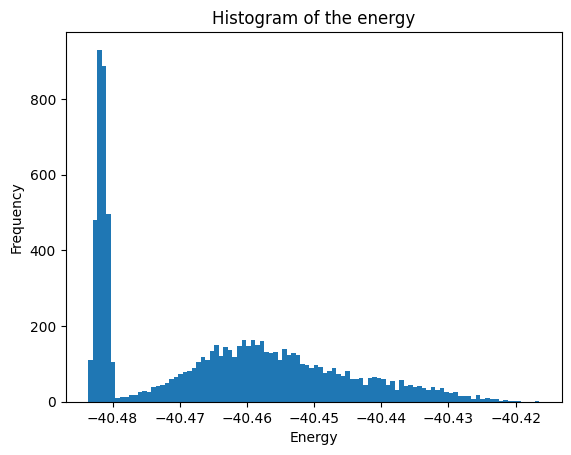

In [2]:
# Q1.A. Data preprocessing

# load data using pandas
from pandas import read_csv
data = read_csv('https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv')

# 1. How many points does the dataset contains?
print('The dataset contains:', len(data), 'points')

# 2. What is the point with the lowest energy and what is its value?
print('The value of the lowest energy:', min(data['energy']))
print('The point with the lowest energy:', data['energy'].idxmin())

# 3. What is the range of energies in the dataset? The energy is reported in Hartree
print('The range of energies in the dataset:', max(data['energy']) - min(data['energy']))

# 4. Do a histogram of the energy.
plt.hist(data['energy'], bins=100)
plt.title('Histogram of the energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

In [3]:
# Q1.B Data splitting for training and testing.
# code here
np.random.seed(0)
train_indices = np.random.choice(data.index, size=100, replace=False)
train_data = data.loc[train_indices]

test_indices = np.random.choice(data.index.difference(train_indices), size=500, replace=False)
test_data = data.loc[test_indices]

X_train = train_data.drop(columns=['energy'])
y_train = train_data['energy']
X_test = test_data.drop(columns=['energy'])
y_test = test_data['energy']

print('Training set size:', X_train.shape, y_train.shape)
print('Testing set size:', X_test.shape, y_test.shape)

Training set size: (100, 31) (100,)
Testing set size: (500, 31) (500,)


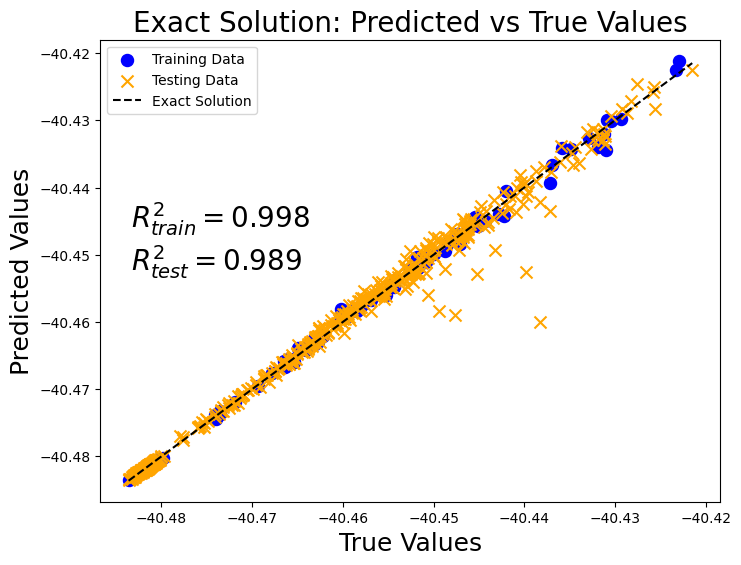

In [4]:
# Q1.C Exact solution of Linear Regression
#code here
def linear_model_solver(X, y):
    Xt = X.T
    A = Xt@X
    z = Xt@y
    A_inv = np.linalg.inv(A)
    w = A_inv@z
    return w

def r2_score_custom(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

w_opt = linear_model_solver(X_train, y_train)
y_train_pred = X_train @ w_opt
y_test_pred = X_test @ w_opt
r2_train = r2_score_custom(y_train, y_train_pred)
r2_test = r2_score_custom(y_test, y_test_pred)

min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))

fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.05,0.5,f'$R^2_{{train}} = {r2_train:.3f}$\n$R^2_{{test}} = {r2_test:.3f}$',transform=ax.transAxes,fontsize=20)
ax.scatter(y_train, y_train_pred, label='Training Data', marker='o', color='blue', s=75)
ax.scatter(y_test, y_test_pred, label='Testing Data', marker='x', color='orange', s=75)
ax.plot([min_val, max_val], [min_val, max_val], '--', label='Exact Solution', color='black')
ax.set_xlabel('True Values', fontsize=18)
ax.set_ylabel('Predicted Values', fontsize=18)
ax.set_title('Exact Solution: Predicted vs True Values', fontsize=20)
plt.legend()

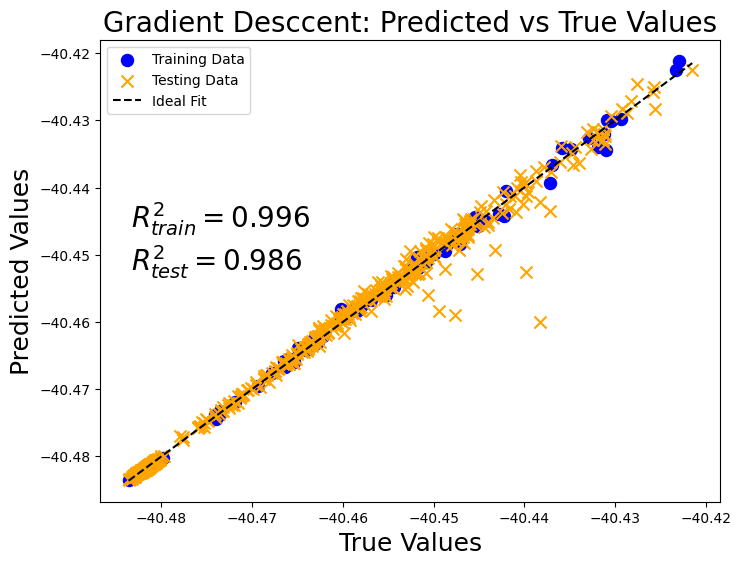

In [5]:
# Q1.C Gradient descent for Linear Regression
# code here
def gradient_Lw(w0, x, y):
    gradLw =(2/np.shape(x)[0])*(-np.dot(x.T, y) + np.dot(np.dot(x.T, x), w0))
    return gradLw

def gradient_descent_step(w0, x, y, eta):
    wold = w0
    wnew = wold - (eta * gradient_Lw(wold, x, y))
    return wnew

def gradient_descent(w0, x, y, eta, tol):
   ctr=0
   wold = w0
   for i in range(10):
     wnew = gradient_descent_step(wold, x, y, eta)
     norm_grad = np.linalg.norm(gradient_Lw(wold, x, y))
     if norm_grad < tol:
        break
     else:
        wold = wnew
   return wnew

w0 = w_opt + np.random.uniform(5E-9,1E-11, (31,))
w_gradient = gradient_descent(w0, X_train, y_train, 0.000001, 0.4)
y_train_pred_gd = X_train @ w_gradient
y_test_pred_gd = X_test @ w_gradient
r2_train_gd = r2_score_custom(y_train, y_train_pred_gd)
r2_test_gd = r2_score_custom(y_test, y_test_pred_gd)

min_val = min(np.min(y_train), np.min(y_test))
max_val = max(np.max(y_train), np.max(y_test))

fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.05, 0.5, f'$R^2_{{train}} = {r2_train_gd:.3f}$\n$R^2_{{test}} = {r2_test_gd:.3f}$', transform=ax.transAxes, fontsize=20)
ax.scatter(y_train, y_train_pred, label='Training Data', marker='o', color='blue', s=75)
ax.scatter(y_test, y_test_pred, label='Testing Data', marker='x', color='orange', s=75)
ax.plot([min_val, max_val], [min_val, max_val], '--', label='Ideal Fit', color='black')
ax.set_xlabel('True Values', fontsize=18)
ax.set_ylabel('Predicted Values', fontsize=18)
ax.set_title('Gradient Desccent: Predicted vs True Values', fontsize=20)
plt.legend()

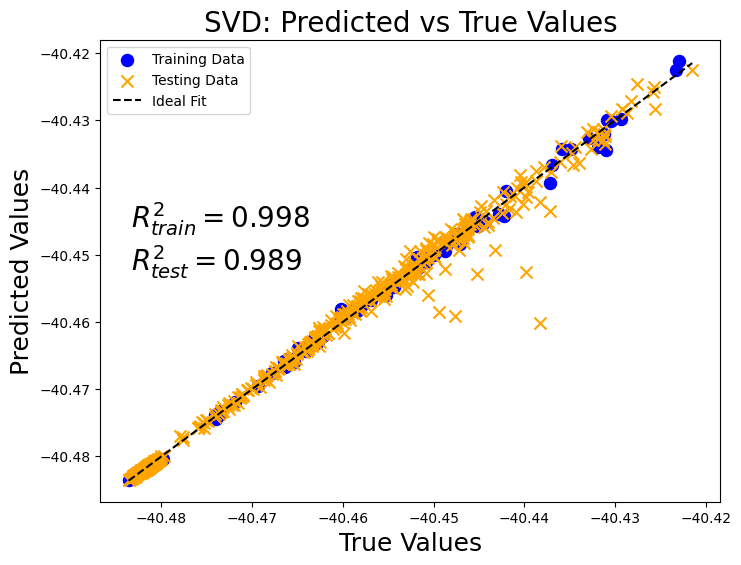

In [6]:
# Q1.C SVD for Linear Regression
# code here
def svd_linear_solver(X, y):
    U, Sigma, Vt = np.linalg.svd(X, full_matrices=False)
    Sigma_inv = np.diag(1 / Sigma)
    w_svd = Vt.T@Sigma_inv@U.T@y
    return w_svd

w_svd = svd_linear_solver(X_train, y_train)
y_train_pred_svd = X_train@w_svd
y_test_pred_svd = X_test@w_svd

r2_train_svd = r2_score_custom(y_train, y_train_pred_svd)
r2_test_svd = r2_score_custom(y_test, y_test_pred_svd)

min_val_svd = min(min(y_train), min(y_test))
max_val_svd = max(max(y_train), max(y_test))

fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0.05, 0.5, f'$R^2_{{train}} = {r2_train_svd:.3f}$\n$R^2_{{test}} = {r2_test_svd:.3f}$', transform=ax.transAxes, fontsize=20)
ax.scatter(y_train, y_train_pred_svd, label='Training Data', marker='o', color='blue', s=75)
ax.scatter(y_test, y_test_pred_svd, label='Testing Data', marker='x', color='orange', s=75)
ax.plot([min_val_svd, max_val_svd], [min_val_svd, max_val_svd], '--', label='Ideal Fit', color='black')
ax.set_xlabel('True Values', fontsize=18)
ax.set_ylabel('Predicted Values', fontsize=18)
ax.set_title('SVD: Predicted vs True Values', fontsize=20)
plt.legend()

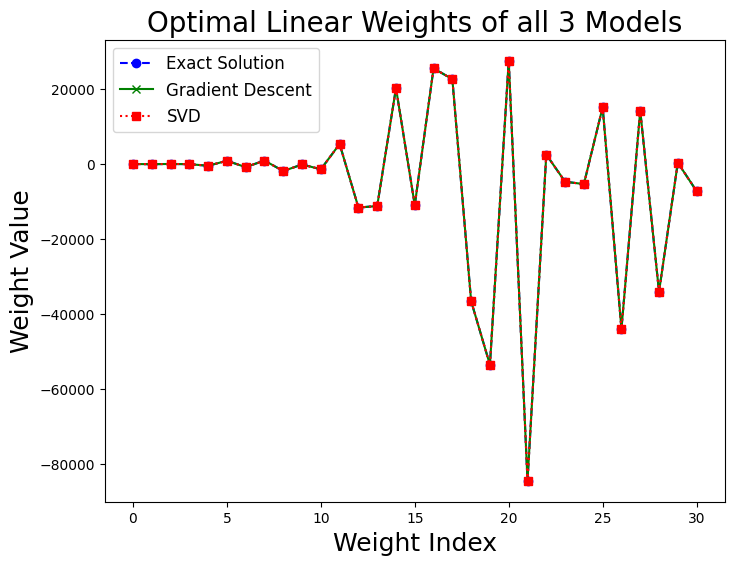

In [17]:
# Plot of all three models
weights_exact = w_opt
weights_gd = w_gradient
weights_svd = w_svd
weight_indices = np.arange(len(weights_exact))

plt.figure(figsize=(8, 6))
plt.plot(weight_indices, weights_exact, label='Exact Solution', marker='o', linestyle='--', color='blue')
plt.plot(weight_indices, weights_gd, label='Gradient Descent', marker='x', linestyle='-', color='green')
plt.plot(weight_indices, weights_svd, label='SVD', marker='s', linestyle=':', color='red')
plt.title('Optimal Linear Weights of all 3 Models', fontsize=20)
plt.xlabel('Weight Index', fontsize=18)
plt.ylabel('Weight Value', fontsize=18)
plt.legend(fontsize=12)

In [8]:
# RMSE to determine which of the three models had the best performance
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_exact = rmse(y_test, y_test_pred)
rmse_gd = rmse(y_test, y_test_pred_gd)
rmse_svd = rmse(y_test, y_test_pred_svd)

print(f"RMSE (Exact Solution): {rmse_exact:.4f}")
print(f"RMSE (Gradient Descent): {rmse_gd:.4f}")
print(f"RMSE (SVD): {rmse_svd:.4f}")


# Model with the lowest test error
if rmse_exact < rmse_gd and rmse_exact < rmse_svd:
    best_model = 'Exact Solution'
elif rmse_gd < rmse_svd:
    best_model = 'Gradient Descent'
else:
    best_model = 'SVD'
print('The best model is:', best_model)

test_errors = []
untouched_data = data.drop(train_data.index).drop(test_data.index)

for i in range(5):
    new_train_data = untouched_data.sample(n=100, random_state=42 + i)
    new_test_data = untouched_data.drop(new_train_data.index)

    X_new_train = new_train_data.iloc[:, :-1].values
    y_new_train = new_train_data.iloc[:, -1].values
    X_new_test = new_test_data.iloc[:, :-1].values
    y_new_test = new_test_data.iloc[:, -1].values

    if best_model == 'Exact Solution':
        w_new = linear_model_solver(X_new_train, y_new_train)
    elif best_model == 'Gradient Descent':
        w0_new = np.random.uniform(size=X_new_train.shape[1])
        w_new = gradient_descent(w0_new, X_new_train, y_new_train, eta=0.000001, tol=0.4)
    elif best_model == 'SVD':
        w_new = svd_linear_solver(X_new_train, y_new_train)

    y_new_test_pred = X_new_test @ w_new
    test_errors.append(rmse(y_new_test, y_new_test_pred))

mean_error = np.mean(test_errors)
std_error = np.std(test_errors)

print(f"Mean Test RMSE: {mean_error:.4f}")
print(f"Standard Deviation of Test RMSE: {std_error:.4f}")

RMSE (Exact Solution): 0.0016
RMSE (Gradient Descent): 0.0019
RMSE (SVD): 0.0016
The best model is: Exact Solution
Mean Test RMSE: 0.0019
Standard Deviation of Test RMSE: 0.0011


# (Q2) Newton's method for Nonlinear set of equations

* For **Q2** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

Let's consider the following reactions,
$$
ScF_3(s) \to Sc^{3+}(aq) + 3F^{-}(aq), \;\; K_{sp} = 4.2\times10^{-18}\\
HF(aq) + H_2O \to H_3O^{+}(aq) + F^{-}(aq), \;\; K_{a} = 5.6\times10^-4\\
2H_2O \to H_3O^{+} + OH^{-}(aq), \;\; K_w = 10^{-14}
$$


We can write the concentration values for each species at equilibrium using three main variables, $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
These give us the following relations,
$$
K_{sp} = x_{sp}(3x_{sp}+ x_a)^3 \\
K_{a} = \frac{(x_{a}+x_w)(3x_{sp} + x_a)}{-x_a} \\
K_w = (x_a+x_w)(x_w)
$$

You can use the following initial values for each species,
1. $x_{sp} = 2\times^{-5}$
2. $x_a = -6.2\times^{-4}$
3. $x_w = 6.2\times^{-4}$
   
```x0 = np.array([2E-5,-6.2E-4,62E-4])```. <br>

 <br>

**Results to include,**
1. Implement the Vector function to find $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
2. Implement the Jacobian function.
3. Implement the Newton's method step function.
4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.
5. The value of the concentrations.
6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.
7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.


In [9]:
def functions(x, k):    # xT = [xsp, xa, xw], kT = [Ksp, Ka, Kw]

    fsp = k[0] - x[0]*((3*x[0] + x[1])**3)
    fa = k[1]*x[1] + (x[1] + x[2])*(3*x[0] + x[1])
    fw = k[2] - (x[1] + x[2])*x[2]

    f=np.array([fsp, fa, fw])

    return f

def jacobian(x, k):     # xT = [xsp, xa, xw], kT = [Ksp, Ka, Kw]

    jacobian =[[(((-9*x[0]) * ((3*x[0] + x[1])**2)) - ((3*x[0] + x[1])**3)), (-3*x[0] * ((3*x[0] + x[1])**2)), 0],
               [(3*(x[1] + x[2])), (k[1] + 3*x[0] + 2*x[1] + x[2]), (3*x[0] + x[1])],
               [0, -x[2], (-x[1] - 2*x[2])]]

    return jacobian

def error_function(x, k):
    f = functions(x, k)
    return 0.5 * np.dot(f, f)

def newton_step(x0, k):    # xT = [xsp, xa, xw], kT = [Ksp, Ka, Kw], tol = number (float or int) fix this make it how it was before
    xold = x0
    f = functions(xold, k)
    jac = jacobian(xold, k)
    xnew = xold - np.linalg.inv(jac)@(f)
    return xnew

In [10]:
# Newton's method

k = np.array([4.2E-18, 5.6E-4,1E-14])
x0 = np.array([2E-5,-6.2E-4,6.2E-4])

def newtons_method(x0, k, tol):

  ctr = 0
  xold = x0
  positions = np.array([x0])
  errors = np.array([error_function(x0, k)])

  for i in range(1000):

    ctr += 1

    xnew = newton_step(xold, k)
    positions = np.append(positions, [xnew], axis=0)
    errors = np.append(errors, [error_function(xnew, k)], axis=0)

    diff = abs(xnew - xold)

    if diff[0] and diff[1] and diff[2] < tol:
      break
    else:
      xold = xnew

  return positions[-1], positions, errors, ctr, diff

finalx, positions= newtons_method(x0, k, 1E-12)[0:2]
ctr = newtons_method(x0, k, 1e-12)[3]
print('final position:', finalx)

final position: [ 1.98621691e-05 -1.01142285e-08  1.05184905e-07]


In [11]:
# Newton's method with a random initial guess
k = np.array([4.2E-18, 5.6E-4, 1E-14])
x0 = np.random.uniform(1E-3,1E-3, (3,))

# code here for the iteration of Newton's method

finalx, positions = newtons_method(x0, k, 1E-12)[0:2]
print('final position:', finalx)

#print(positions)

final position: [ 1.98621691e-05 -1.01142285e-08  1.05184905e-07]


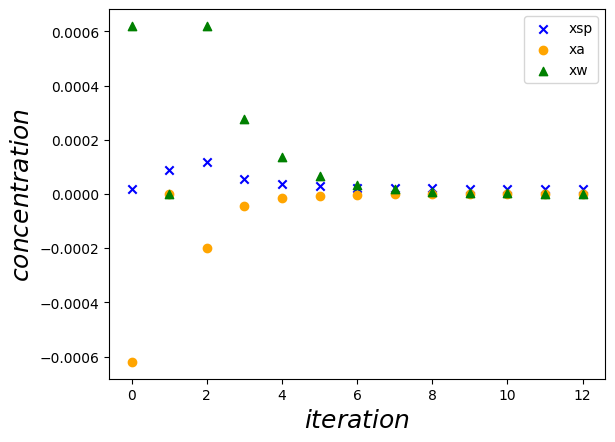

In [12]:
# Q2 Results
# 4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.

k = np.array([4.2E-18, 5.6E-4,1E-14])
x0 = np.array([2E-5,-6.2E-4,6.2E-4])

positions = newtons_method(x0, k, 1E-6)[1]
ctr = newtons_method(x0, k, 1E-6)[3]

iteration = np.arange(0, ctr+1)

xsp = positions[: , 0]
xa = positions[: , 1]
xw = positions[: , 2]

fig, ax = plt.subplots()

ax.scatter(iteration, xsp, c='blue', label="xsp", marker='x')
ax.scatter(iteration, xa, c='orange', label="xa", marker='o')
ax.scatter(iteration, xw, c='green', label="xw", marker='^')

ax.set_xlabel(r'$iteration$', fontsize=18)
ax.set_ylabel(r'$concentration$', fontsize=18)
ax.legend()

plt.show()

In [13]:
# 5. The value of the concentrations.

k = np.array([4.2E-18, 5.6E-4,1E-14])
x0 = np.array([2E-5,-6.2E-4,6.2E-4])

finalx, positions = newtons_method(x0, k, 1E-12)[0:2]

print('x_sp:', finalx[0], '\nx_a:', finalx[1], '\nx_w', finalx[2], '\n')

#print(positions)

# 6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.

iterations = newtons_method(x0, k, 1E-4)[3]
print('iterations:', iterations)

# 7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.

x0 = np.random.uniform(1E-7,1E+2,(3,))

finalx, positions = newtons_method(x0, k, 1E-12)[0:2]
iterations = newtons_method(x0, k, 1E-12)[3]

print('\nx_sp:', finalx[0], '\nx_a:', finalx[1], '\nx_w', finalx[2], '\n')
print('iterations:', iterations)

#print(positions)

# Answer does not depend on the inital conentrations.

x_sp: 1.9862169062541497e-05 
x_a: -1.0114228499209495e-08 
x_w 1.0518490462160076e-07 

iterations: 5

x_sp: 1.9862169083055442e-05 
x_a: -1.0114228509355764e-08 
x_w 1.0518490462562272e-07 

iterations: 57


# Q3 Molecular orbitals and Diagonalization

# Hückel model
As we saw in class, the Hückel model is one of the most basic models to describe the interaction between electrons in a molecule. <br>
The Hückel model is based on the following assumptions:
1. Only next-nearest neighbors atoms form bonds and if so $S_{ij} = 1$, else $S_{ij} = 0$.
2. The matrix elements of the Hamiltonian are described depending on the type of atom. <br>
   We will follow the notation of the paper, [A Pariser-Parr-Pople-based set of Hueckel molecular orbital parameters](https://pubs.acs.org/doi/abs/10.1021/jo01311a060), <br>
   where the diagonal elements ($h_i$) and off-diagonal elements ($h_{ij}$) are given by,

    $$
    h_{i} = \alpha_0 + h_{X} \beta_0 \\
    $$
    $$
    h_{ij} = h_{X,Y} \beta_0 \\
    $$
    
Table 1 and 2 from [paper](https://pubs.acs.org/doi/abs/10.1021/jo01311a060) have those respected values.
1. Table 1 $\to$ $h_i$ for different types of atoms.
2. Table 2 $\to$ $ h_{X,Y}$ for different types of atoms, $X$ and $Y$ are the index for the type of atoms that form a bond.

**Results to include,**
1. What is the **HOMO-LUMO** value for Benzene.
2. Plot HOMO or LUMO orbital using the ```plot_benzene_with_lcao_circles()``` function.
   

In [14]:
def create_hamiltonian_for_benzene():
    # code here

    x = 0 # = E-alpha
    alpha = 0
    beta = -1

    H = ([[x, beta, 0, 0, 0, beta],
         [beta, x, beta, 0, 0, 0],
         [0, beta, x, beta, 0, 0],
         [0, 0, beta, x, beta, 0],
         [0, 0, 0, beta, x, beta],
         [beta, 0, 0, 0, beta, x]])

    return H

def diagonalize_hamiltonian():

    H = create_hamiltonian_for_benzene()

    eigenvalues, eigenvectors = np.linalg.eigh(H)

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = diagonalize_hamiltonian()

def energy():

    alpha = 0
    beta = -1

    eigenvalues, eigenvectors = diagonalize_hamiltonian()

    E = np.zeros_like(eigenvalues)

    for i in range(len(E)):
        E[i] = alpha - eigenvalues[i]*beta

    return E

E = energy()

HOMOLUMO = E[4]-E[1]
print(HOMOLUMO)

2.0


In [15]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Define the benzene molecule coordinates
def benzene_positions():
    # 6 evenly spaced points around a circle
    theta = np.linspace(0, 2 * np.pi, 7)[:-1]
    radius = 1.0
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y]).T

# Plot benzene with LCAO magnitudes
def plot_benzene_with_lcao_circles(magnitudes):
    positions = benzene_positions()
    # magnitudes = generate_lcao_magnitudes()

    # Normalize magnitudes for color mapping
    norm = Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
    colormap = plt.cm.viridis

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Plot benzene structure
    for i in range(len(positions)):
        ax.plot(
            [positions[i, 0], positions[(i + 1) % len(positions), 0]],
            [positions[i, 1], positions[(i + 1) % len(positions), 1]],
            'k-', lw=2
        )

    # Plot circles for each carbon atom
    for pos, mag in zip(positions, magnitudes):
        color = colormap(norm(mag))
        circle = plt.Circle(pos, radius=0.2, color=color,
                            edgecolor='black', lw=1)
        ax.add_artist(circle)
        ax.text(pos[0], pos[1], f"{mag:.2f}", fontsize=8,
                ha='center', va='center', color='white')

    # Add colorbar
    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array(magnitudes)
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Magnitude of LCAO")

    # Adjust plot limits and labels
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    plt.title("Benzene with LCAO Magnitudes (Circles by Magnitude)")
    plt.show()


[-0.   0.5  0.5  0.  -0.5 -0.5]


<ipython-input-15-5873fd6eb364>:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle(pos, radius=0.2, color=color,


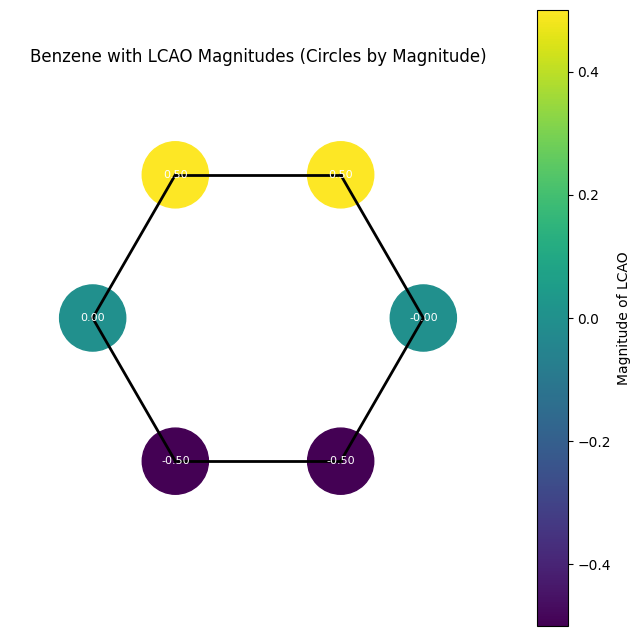



[ 0.  -0.5  0.5  0.  -0.5  0.5]


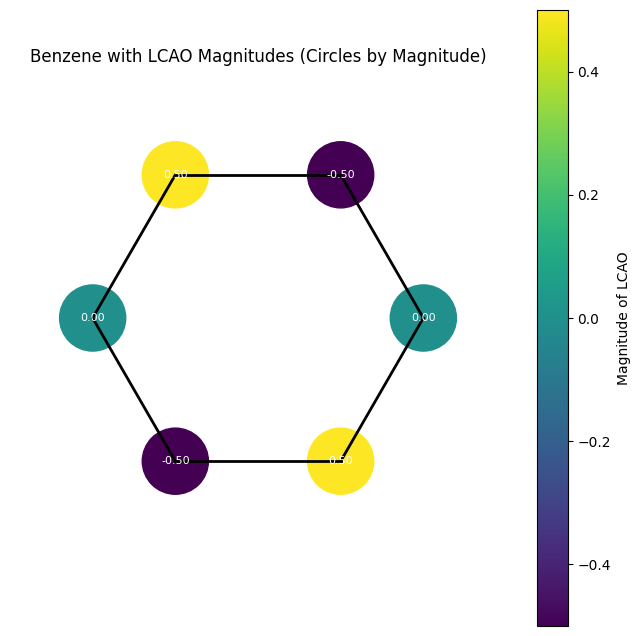

In [16]:
# LCAO data: random magnitudes for demonstration (replace with actual data)

eigenvalues, eigenvectors = diagonalize_hamiltonian()

LUMO = eigenvectors[:, 2]
HOMO = eigenvectors[:, 4]

print(LUMO)
plot_benzene_with_lcao_circles(LUMO)

print('\n')

print(HOMO)
plot_benzene_with_lcao_circles(HOMO)